<center><h1>Linear Regression Models in R</h1></center>


# 1 Linear Regression Models

<center><img src="images/age_height.png" width=720 /></center>

<center><img src="images/age_height_lm.png" width=720 /></center>

In [ ]:
## Below is the code for simulating the child height, weight, and age data

library(ggplot2)
library(plotly)

set.seed(137)

n <- 500

beta0 <- 80
beta1 <- 3.5
beta2 <- 2.0

age <- rnorm(n, 3.5, 1.5)
weight <- rnorm(n, 16, 3)
height <- beta0 + beta1*age + beta2*weight + rnorm(n, 8, 3.5)

ds <- data.frame(age, weight, height)

## We can use the plot_ly() function to generate a 3-d plot
plot_ly(ds, x = ~age, y = ~weight, z = ~height, marker = list(symbol = 'circle', 
                                                              size = 5, 
                                                              color = "blueviolet"))


## 1.1 Linear Regression Models (Review)
        
$$ y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_p x_{ip} + \varepsilon_i $$  
  - Outcome variable ($y$) is continuous
  - Can have one or many predictor variables
  - Predictors can be continuous or categorical
  - Examples: 
    + Estimating effect square footage on home price             
    + Effect of age and weight on blood pressure


### 1.1.1 Linear Regression Models (cont.)
 $$ \text{height}_i = \beta_0 + \beta_1 \text{age}_i + \varepsilon_i $$  
 
$\texttt{height}_i$: dependent/outcome variable

$\texttt{age}_i$: predictor variable

## 1.2 Assumptions of Linear Regression Models
                

- $E(y_i) = \mu_i = \beta_0 + \beta_1 x_i $ 
  + Or equivalently $E(\varepsilon_i) = 0$
  + The means of $E(y_i)$ are on a straight line
- $var(y_i) = \sigma^2$
  + Or equivalently $var(\varepsilon_i) = \sigma^2$
  + Known as _homoscedasticity_
- $cov(y_i, y_j) = 0$ 
  + Or equivalently $cov(\varepsilon_i, \varepsilon_j) = 0$
  + Errors are uncorrelated
- $\varepsilon_i$ is normally distributed
  + Needed when using maximum likelihood estimation (MLE), but not ordinary least squares (OLS)


## 1.3 Single-Variable Linear Regression
Suppose we are interested in predicting the total area destroyed by wildfires using air temperature measurements. We can do this using linear regression.

In [1]:
library(ggplot2)  

fires_df <- read.csv("data/montesinho_forestfires.csv")

head(fires_df)

,x,y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


### 1.3.1 Plotting Data (_always!!_)

Warning message:
“Removed 5 rows containing missing values (geom_point).”


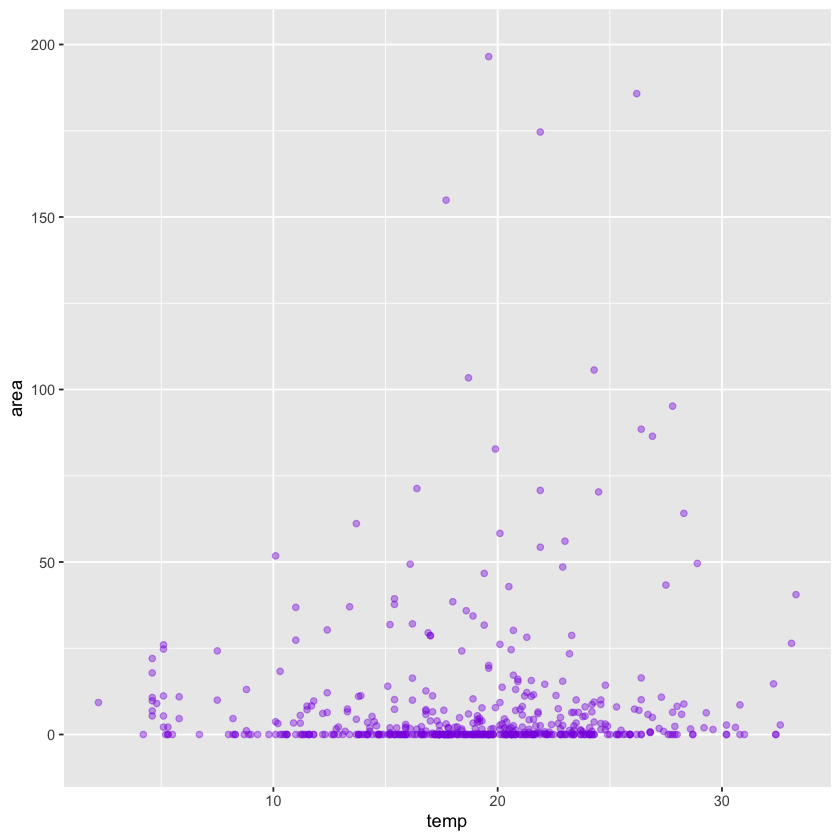

In [5]:
ggplot(fires_df, aes(x = temp, y = area)) +
    geom_point(colour = "blueviolet", alpha = 0.4) +
    ylim(-5, 200)

### 1.3.2 The `lm()` Function in R

  - Performs linear regression
  - Create a fitted linear model object, which contains resultss

In [9]:
fm1 <- lm(area ~ temp, fires_df)   # perform linear regression

summary(fm1)                       # see output of regression


Call:
lm(formula = area ~ temp, data = fires_df)

Residuals:
    Min      1Q  Median      3Q     Max 
 -27.34  -14.68  -10.39   -3.42 1071.33 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -7.4138     9.4996  -0.780   0.4355  
temp          1.0726     0.4808   2.231   0.0261 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 63.41 on 515 degrees of freedom
Multiple R-squared:  0.009573,	Adjusted R-squared:  0.00765 
F-statistic: 4.978 on 1 and 515 DF,  p-value: 0.0261


### 1.3.3 Using `tidy()` Instead of `summary()`

- `tidy()` function from _broom_ package gives us (arguably) nicer output
- Newer, and somewhat less common, but part of _tidyverse_ ecosystem (e.g., _dplyr_, _ggplot2_)

In [12]:
library(broom)

tidy(fm1)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.413752,9.4996115,-0.7804268,0.43549824
temp,1.072628,0.4807528,2.2311417,0.02610146


## 1.4 Multivariate Linear Regression 

  - Regression modeles can have arbitrary number of predictor variales
  - Simply add variable in the formula (e.g., `y ~ x1 + x2 + x3`)

In [14]:
fm2 <- lm(area ~ temp + rain, fires_df)

tidy(fm2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.552250,9.5175136,-0.7935108,0.42784644
temp,1.083471,0.4823372,2.2462931,0.02510906
rain,-3.061430,9.4633058,-0.3235053,0.74644416


## 2. Model Fit and Diagnostics

 - How "good" is our model?
 - Which model is "better"?

## 2.1 Interpretting $R^2$

- Represents the proportion of variance explained
- Sometimes called "_coefficient of determination_"

$$R^{2} = 1 - \frac{SSE}{SST}$$

where we have,

$SSE = \sum_{i}^{n} \left( y_{i} - \hat{y_{i}} \right) ^{2}$, and 

$SST = \sum_{i}^{n} \left( y_{i} - \bar{y} \right) ^{2}$

### 2.1.1 $R^2$ with `glance()` 

In [18]:
glance(fm1)        # using glance() on our fitted model object

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.009573469,0.007650311,63.41186,4.977993,0.02610146,1,-2877.959,5761.918,5774.662,2070848,515,517


### 2.1.2 $R^2$ with `summary()`

In [21]:
summary(fm2)


Call:
lm(formula = area ~ temp + rain, data = fires_df)

Residuals:
    Min      1Q  Median      3Q     Max 
 -27.55  -14.55  -10.32   -3.39 1071.20 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -7.5522     9.5175  -0.794   0.4278  
temp          1.0835     0.4823   2.246   0.0251 *
rain         -3.0614     9.4633  -0.324   0.7464  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 63.47 on 514 degrees of freedom
Multiple R-squared:  0.009775,	Adjusted R-squared:  0.005922 
F-statistic: 2.537 on 2 and 514 DF,  p-value: 0.08009


## 2.2 What is a "good" $R^2$ Value?



<center>It depends...</center>


<center>¯\_(ツ)_/¯</center>

## 2.3 Residuals and Outliers

In [22]:
fm1_aug <- augment(fm1)

head(fm1_aug)

area,temp,.fitted,.resid,.std.resid,.hat,.sigma,.cooksd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,8.2,1.381795,-1.381795,-0.02188402,0.008501591,63.47348,2.053206e-06
0,18.0,11.893546,-11.893546,-0.18774621,0.001979679,63.47134,3.495971e-05
0,14.6,8.246612,-8.246612,-0.13024338,0.002991659,63.47247,2.545040e-05
0,8.3,1.489058,-1.489058,-0.02358133,0.008379287,63.47348,2.349460e-06
0,11.4,4.814203,-4.814203,-0.07611617,0.005158049,63.47316,1.501949e-05
0,22.2,16.398582,-16.398582,-0.25893655,0.002564289,63.46938,8.618640e-05


### 2.3.1 Distribution of Residuals

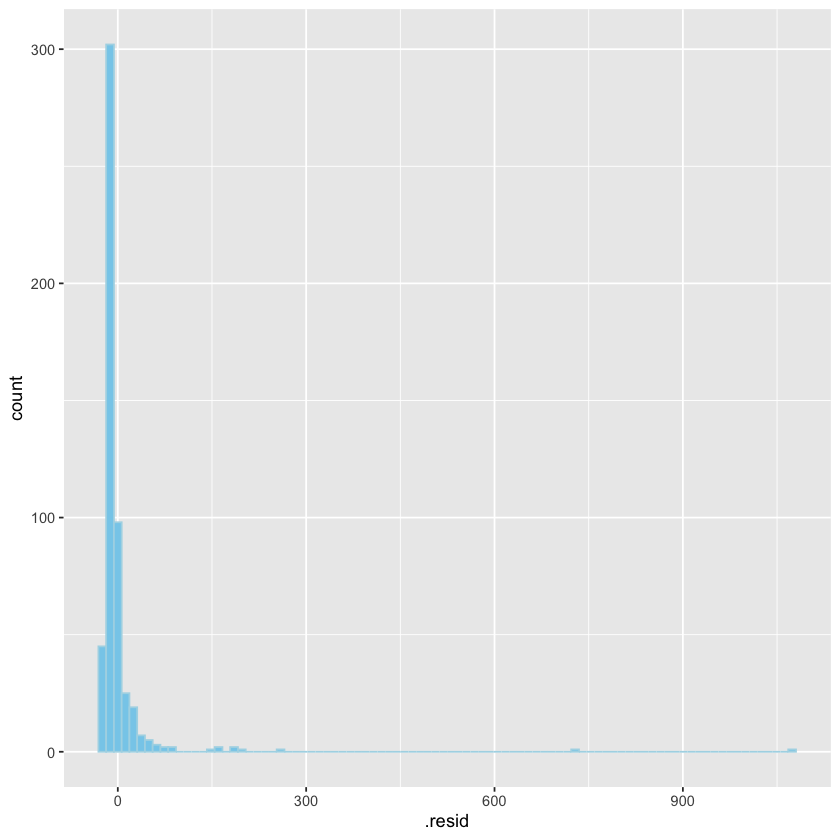

In [24]:
ggplot(fm1_aug, aes(x = .resid)) +
    geom_histogram(colour = "lightblue", fill = "skyblue", bins = 90) 

### 2.3.2 Cook's Distance (Cook's D)

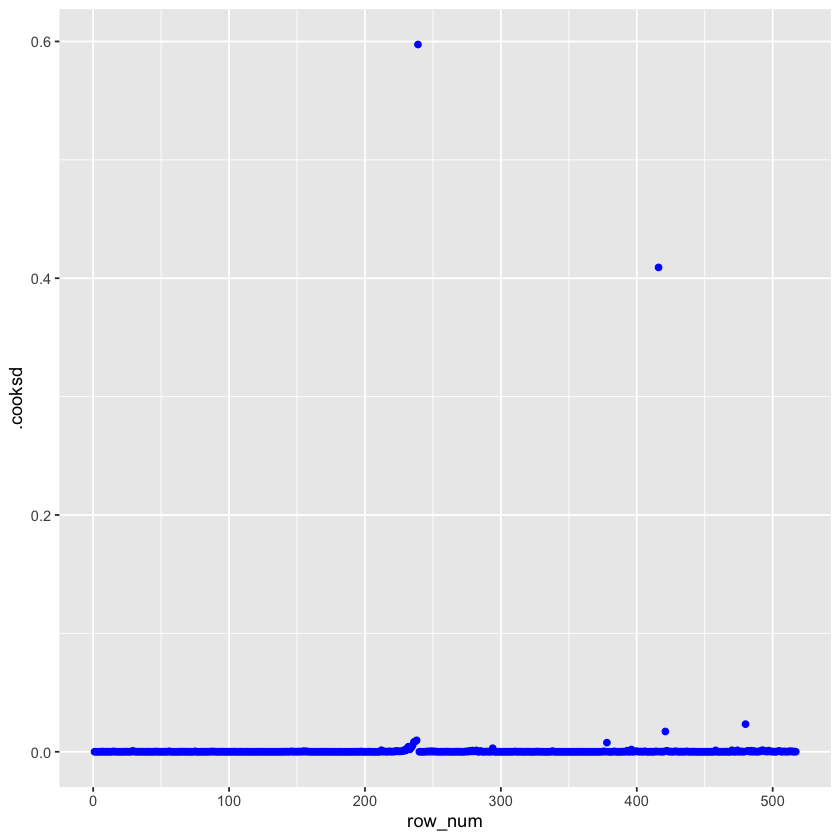

In [25]:
fm1_aug$row_num <- 1:nrow(fm1_aug)

ggplot(fm1_aug, aes(x = row_num, y = .cooksd)) +
    geom_point(colour = "blue") 

### 2.3.3 Residuals vs. Fitted Values

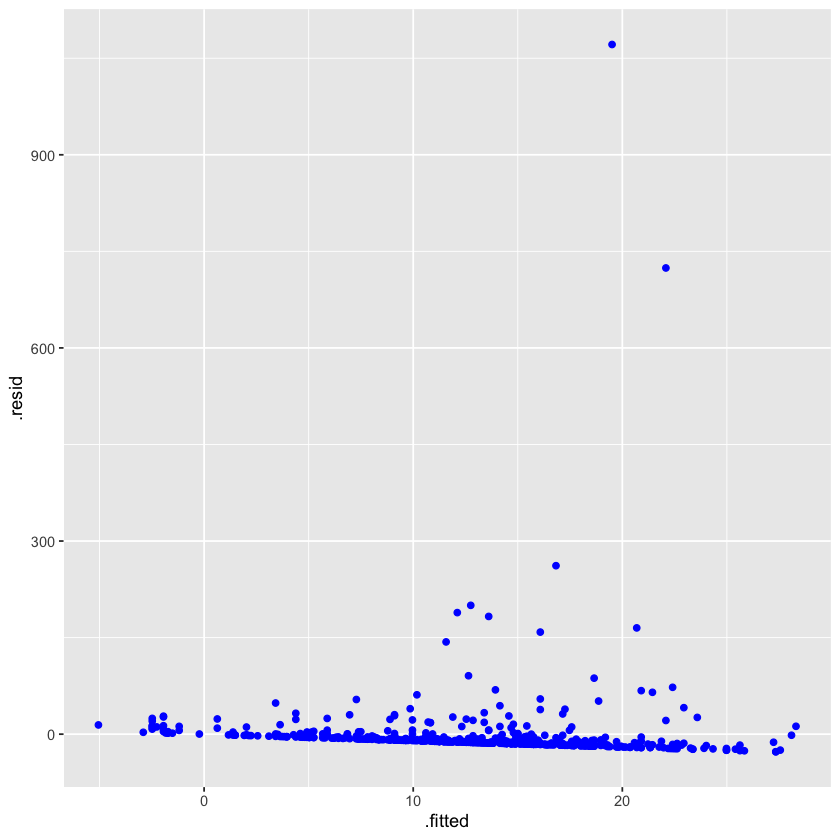

In [26]:
ggplot(fm1_aug, aes(x = .fitted, y = .resid)) +
    geom_point(colour = "blue") 